In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing lib

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
#reading the dataset

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_8696\2353482176.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')


In [3]:
df.dropna(subset=['country', 'region_txt', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt'], inplace=True)
#cleaning the dataset


In [4]:
print(df.describe())


            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       

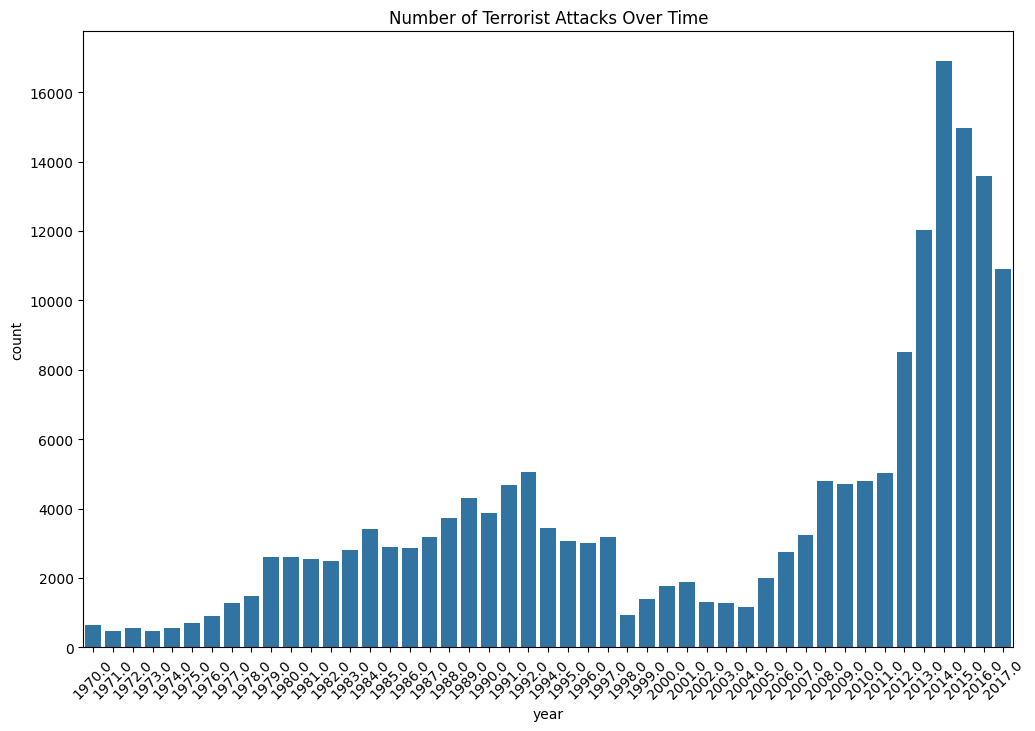

In [5]:
plt.figure(figsize=(12, 8))
# Concatenate 'iyear', 'imonth', and 'iday' columns into a single string with a delimiter '-'
df['date_str'] = df['iyear'].astype(str) + '-' + df['imonth'].astype(str) + '-' + df['iday'].astype(str)

# Convert the concatenated string to datetime format
df['datetime'] = pd.to_datetime(df['date_str'], errors='coerce')

# Drop the intermediate 'date_str' column
df.drop(columns=['date_str'], inplace=True)

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

sns.countplot(x='year', data=df)
plt.title('Number of Terrorist Attacks Over Time')
plt.xticks(rotation=45)
plt.show()


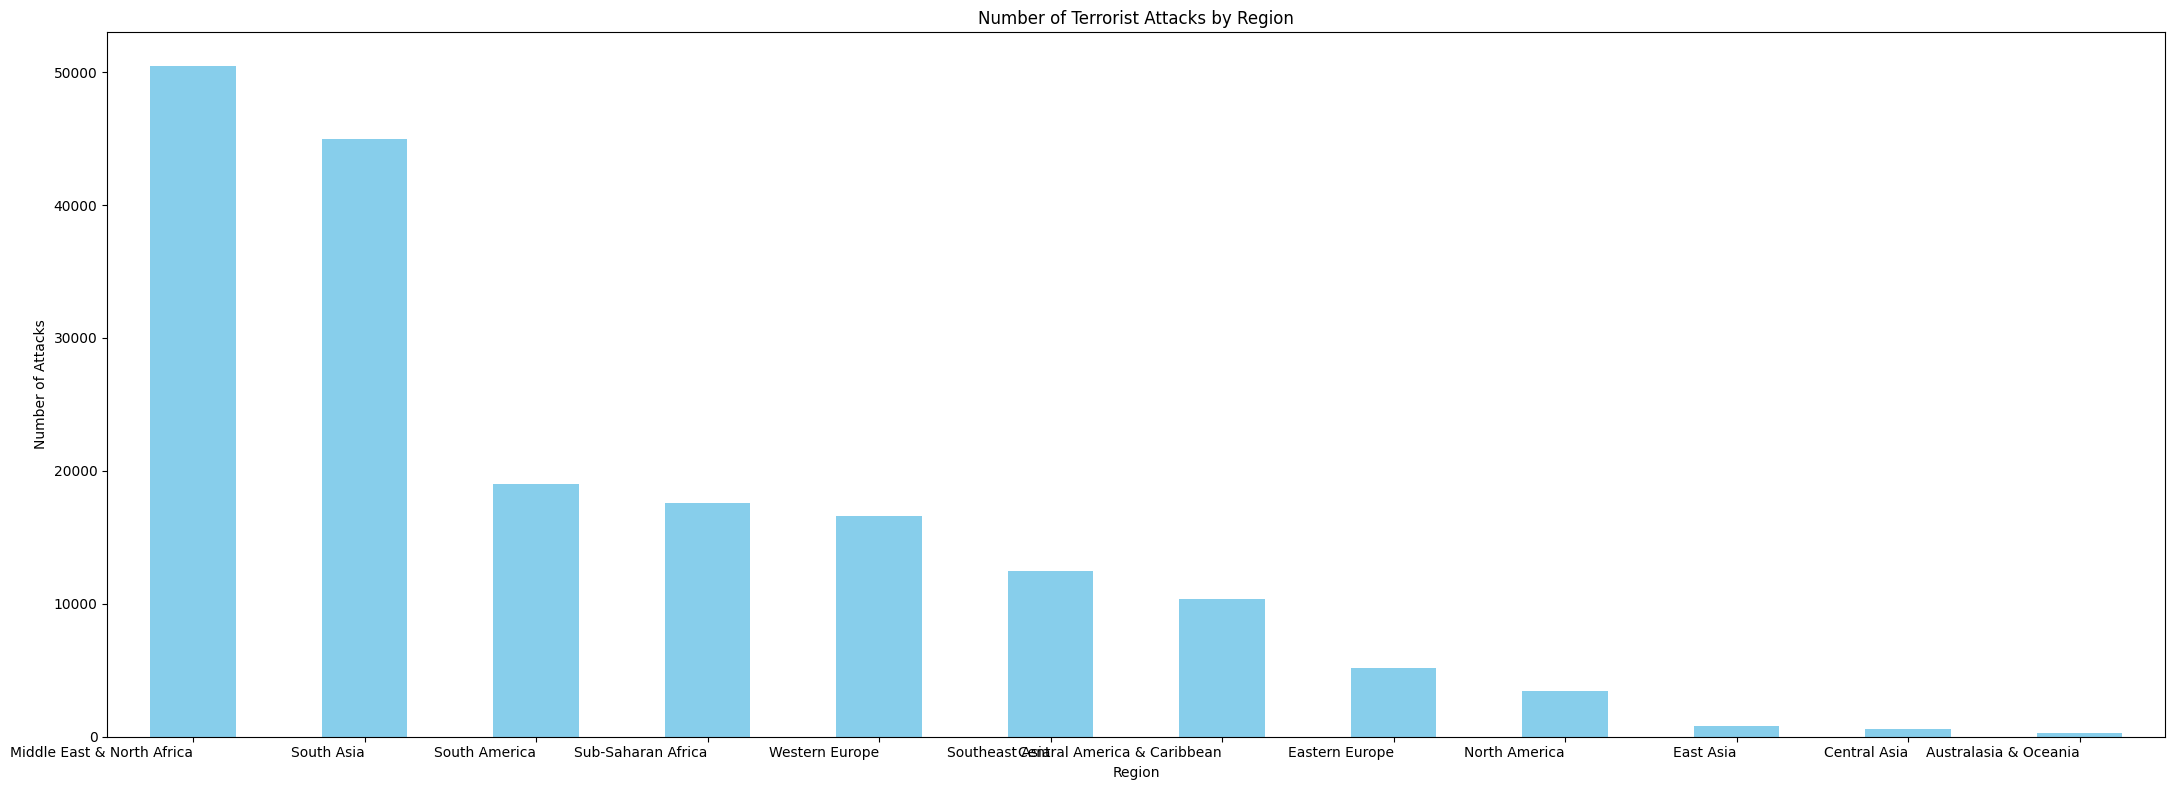

In [6]:
plt.figure(figsize=(22,8))

# Count the number of terrorist attacks per region
region_counts = df['region_txt'].value_counts()

# Plotting a bar plot
region_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Terrorist Attacks by Region')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=360, ha='right')  
plt.tight_layout()  

plt.show()


In [7]:
# Hot Zones
hot_zones = df['country_txt'].value_counts().head(10)
print("Top 10 Hot Zones of Terrorism:\n", hot_zones)


Top 10 Hot Zones of Terrorism:
 country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64


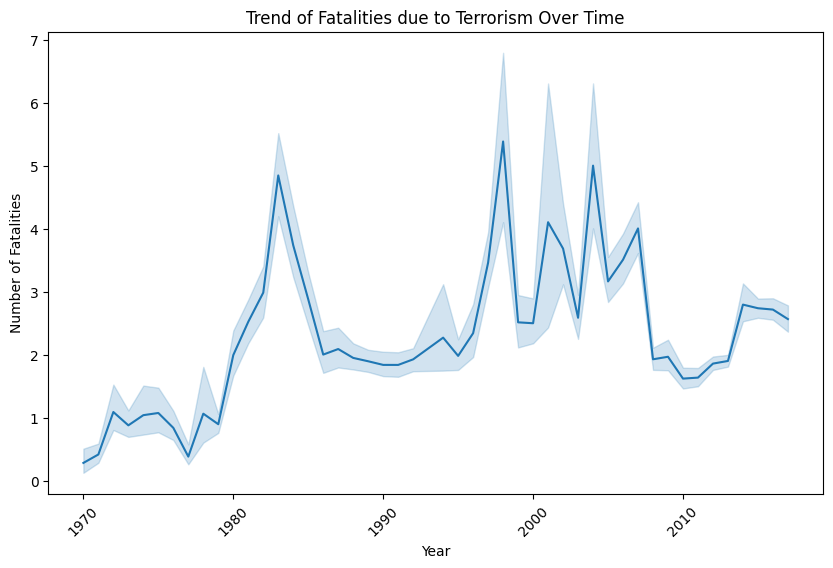

In [8]:
# Trend Analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='nkill', data=df)
plt.title('Trend of Fatalities due to Terrorism Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.show()